In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

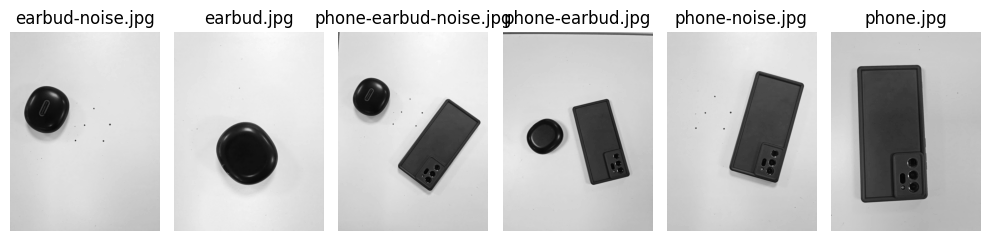

In [3]:
import os

# Directory containing test images
test_images_dir = 'test_images'

# List all image files in the directory
image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpg')]

# Number of images
num_images = len(image_files)

# Create a subplot for each image
plt.figure(figsize=(10, 10))
for i, image_file in enumerate(image_files):
    img_path = os.path.join(test_images_dir, image_file)
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(image_file)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Example array
array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Find the maximum value in the array
max_value = np.max(array)
print("Maximum value in the array:", max_value)

Maximum value in the array: 9


## Structure Element (SE)
**Strucutre Element (SE):** is a freestyle kernel with a center elements as the origin, this mean the SE is a kernel but can have many shape while satisfying 3 condiions:                          
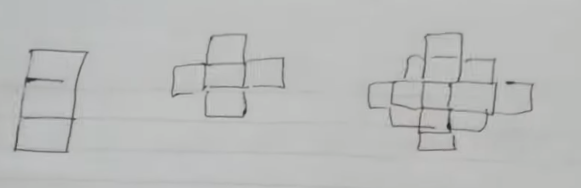
 
1. **Fit:** fit the height/width of the image.  
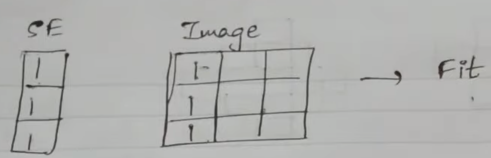

2. **Hit:** At least 1 of the elements matched (i.e. corresponding to at least element in SE)                                                       
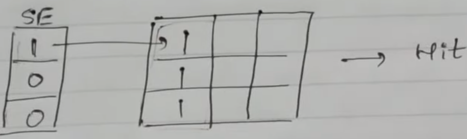

3. **Miss:** At least 1 of the elements matches (example below  miss-all)                                               
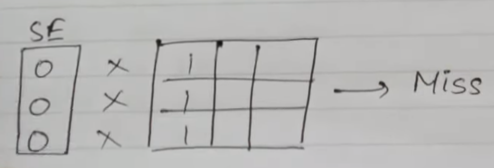
 
**Types of Structure Element:** Box & Disk type are among the most popular where 
+ Element values are 0, 1 and none (!)
+ Empty spots in the structuring elements are ignore
+ apart from this, SEs can have varying sizes.
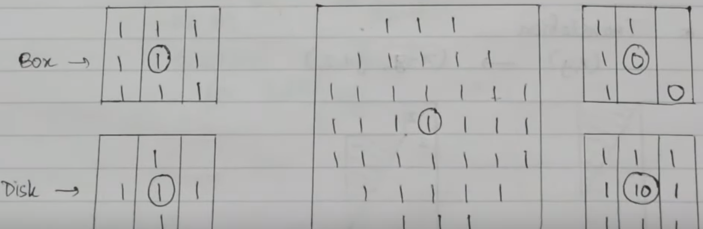

+ Different size of kernel example:                               
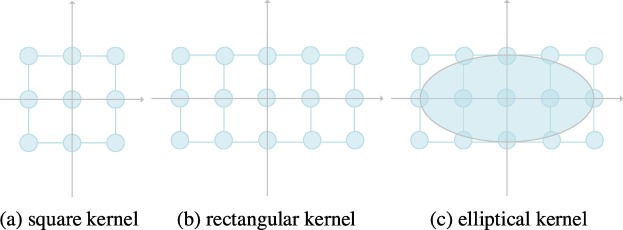

## Morphological Operation
### 1) Dilation and Erosion

-> **Dilation** *slices a kernel over the image. At each position, the pixel at the **anchor point** is replace by the maximum value found within the kernel's region where the Structure Element is nonzero. (note: pixel at anchor point is the pixel matched with SE anchor point).*


-> **Erosion** do **the same but choose the smallest value** then assigning it to the anchor point in the output. 

In [5]:
def kernel_region_of_interest(region, kernel):
    k_h, k_w = kernel.shape
    region_of_interest = []
    
    # iterate though kernel and retrieve HIT
    for row in range(k_h): 
        for col in range(k_w):
            if kernel[row, col] == 1:
                region_of_interest.append(region[row, col])
                
    return region_of_interest


region = np.array([
    [ 50,  80,  20 ],
    [100, 200, 150],
    [ 30,  90,  60]
])
kernel = np.array([[1, 0, 1],
                   [1, 1, 1],
                   [0, 1, 0]])

#? only retrieve value where kernel == 1
print(kernel_region_of_interest(region, kernel))


[np.int64(50), np.int64(20), np.int64(100), np.int64(200), np.int64(150), np.int64(90)]


In [6]:
img = cv.imread('test_images/earbud-noise.jpg')
greyscale_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def morphological_operation(img, kernel, method): 
    #? 1. Get image and kernel shapes
    height, width = img.shape
    k_h, k_w = kernel.shape  # e.g., (3, 3)
    
    #? 2. Pad the image
    pad_h = k_h // 2  # e.g. 3 // 2 = 1 if k_h=3
    pad_w = k_w // 2
    new_height = height + 2*pad_h # add to 2 size horizontally    
    new_width = width + 2*pad_w  # add to 2 size vertically
    
    # Initialize padded image
    padded_img = np.zeros((new_height, new_width), dtype=img.dtype)
    # insert the original img inside the zeros "matrix with padding" 
    padded_img[pad_h:pad_h+height, pad_w:pad_w+width] = img
    
    #? 3. Create output array
    # zeros_like: Return an array of zeros with the same shape and type as a given array
    filtered_img = np.zeros_like(img, dtype=np.float32)
    
    #? 4. Convolution-like operation
    for i in range(height): # rows
        for j in range(width): # cols
            # local region in padded image        
            region = padded_img[i : i + k_h, j : j + k_w] # region_size == kernel_size
            #? considering only position where kernel == 1
            region_of_interest = kernel_region_of_interest(region, kernel)
            
            # assign to output
            if method == "dilation":
                filtered_img[i, j] = np.max(region_of_interest)
            elif method == "erosion":
                filtered_img[i, j] = np.min(region_of_interest)                
            else:
                raise ValueError("Unknown method...")
            
            
    # convert back to original datatype for display
    filtered_img = filtered_img.astype(img.dtype)
    return filtered_img


#? Same as above but expanded more in horizon -> soft, round expansion.
# kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10,10))
# filter_grey_dilation = morphological_operation(greyscale_img, kernel, 'dilation')
# filter_grey_erosion = morphological_operation(greyscale_img, kernel, 'erosion')

# plt.subplot(1, 3, 1)
# plt.imshow(greyscale_img, cmap='gray')
# plt.title('Original Image')

# plt.subplot(1, 3, 2)
# plt.imshow(filter_grey_dilation, cmap='gray')
# plt.title('Dilation Image')

# plt.subplot(1, 3, 3)
# plt.imshow(filter_grey_erosion, cmap='gray')
# plt.title('Erosion Image')

# plt.show()

## Openning & Closing
+ Openning = Erosion -> Dilation
+ Closing = Dilation -> Erosion

In [7]:
earbud_noise = cv.imread('test_images/earbud-noise.jpg')
phone_earbud_noise = cv.imread('test_images/phone-earbud-noise.jpg')
phone_earbud = cv.imread('test_images/phone-earbud.jpg')
phone = cv.imread('test_images/phone.jpg')
earbud = cv.imread('test_images/earbud.jpg')

# grey-scale
earbud_noise = cv.cvtColor(earbud_noise, cv.COLOR_BGR2GRAY)
phone_earbud_noise = cv.cvtColor(phone_earbud_noise, cv.COLOR_BGR2GRAY)
phone_earbud = cv.cvtColor(phone_earbud, cv.COLOR_BGR2GRAY)
phone = cv.cvtColor(phone, cv.COLOR_BGR2GRAY)
earbud = cv.cvtColor(earbud, cv.COLOR_BGR2GRAY)

In [8]:

#? Good kernel for closing and openning
openning_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10,10))
closing_kernel = np.ones((10,10), np.uint8)


#? Openning
def openning(image, kernel):
    erosion = morphological_operation(image, kernel, 'erosion') 
    dilation = morphological_operation(erosion, kernel, 'dilation') 
    
    return dilation

#? Closing
def closing(image, kernel):
    dilation = morphological_operation(image, kernel, 'dilation') 
    erosion = morphological_operation(dilation, kernel, 'erosion') 
    
    return erosion

In [9]:
# Apply OpenCV open operations to all noise images
earbud_noise_closed_cv = cv.morphologyEx(earbud_noise, cv.MORPH_CLOSE, closing_kernel)
phone_earbud_noise_closed_cv = cv.morphologyEx(phone_earbud_noise, cv.MORPH_CLOSE, closing_kernel)

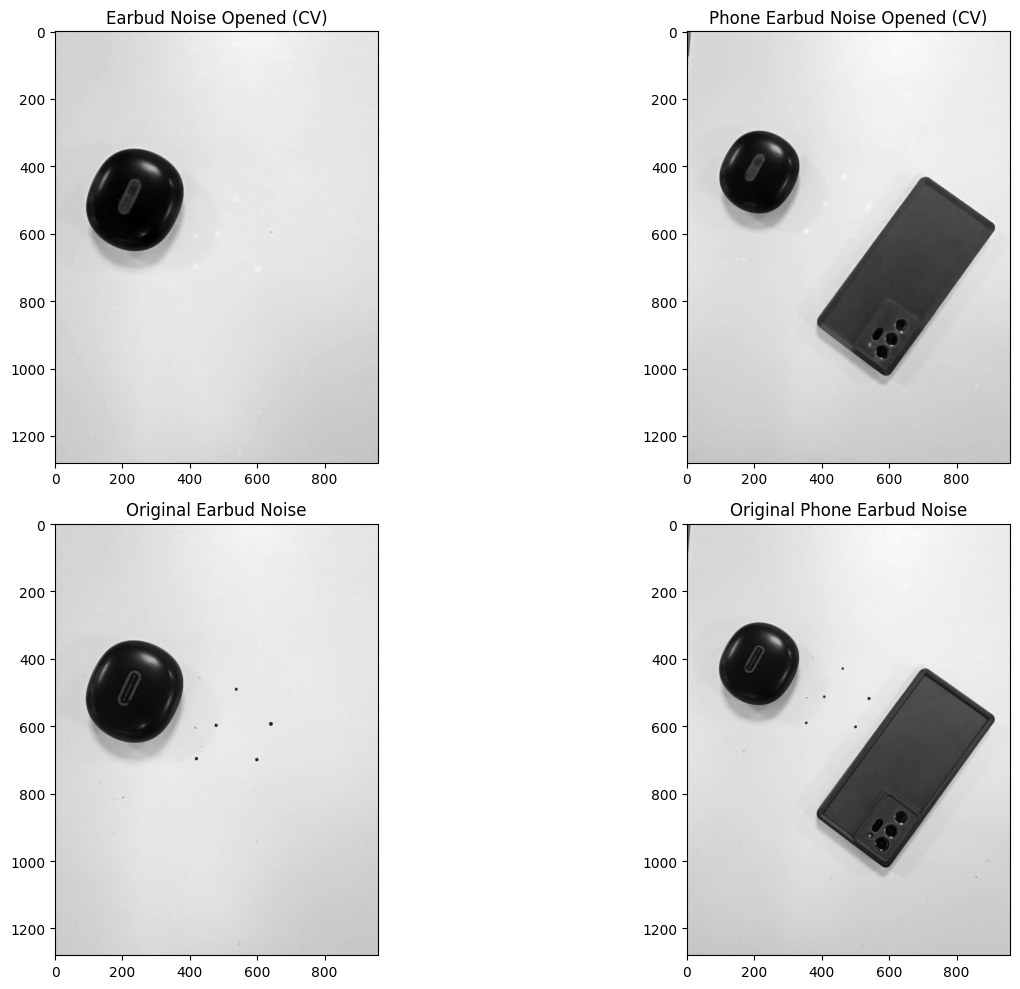

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(earbud_noise_closed_cv, cmap='gray')
plt.title('Earbud Noise Opened (CV)')

plt.subplot(2, 2, 2)
plt.imshow(phone_earbud_noise_closed_cv, cmap='gray')
plt.title('Phone Earbud Noise Opened (CV)')

plt.subplot(2, 2, 3)
plt.imshow(earbud_noise, cmap='gray')
plt.title('Original Earbud Noise')

plt.subplot(2, 2, 4)
plt.imshow(phone_earbud_noise, cmap='gray')
plt.title('Original Phone Earbud Noise')

plt.tight_layout()
plt.show()

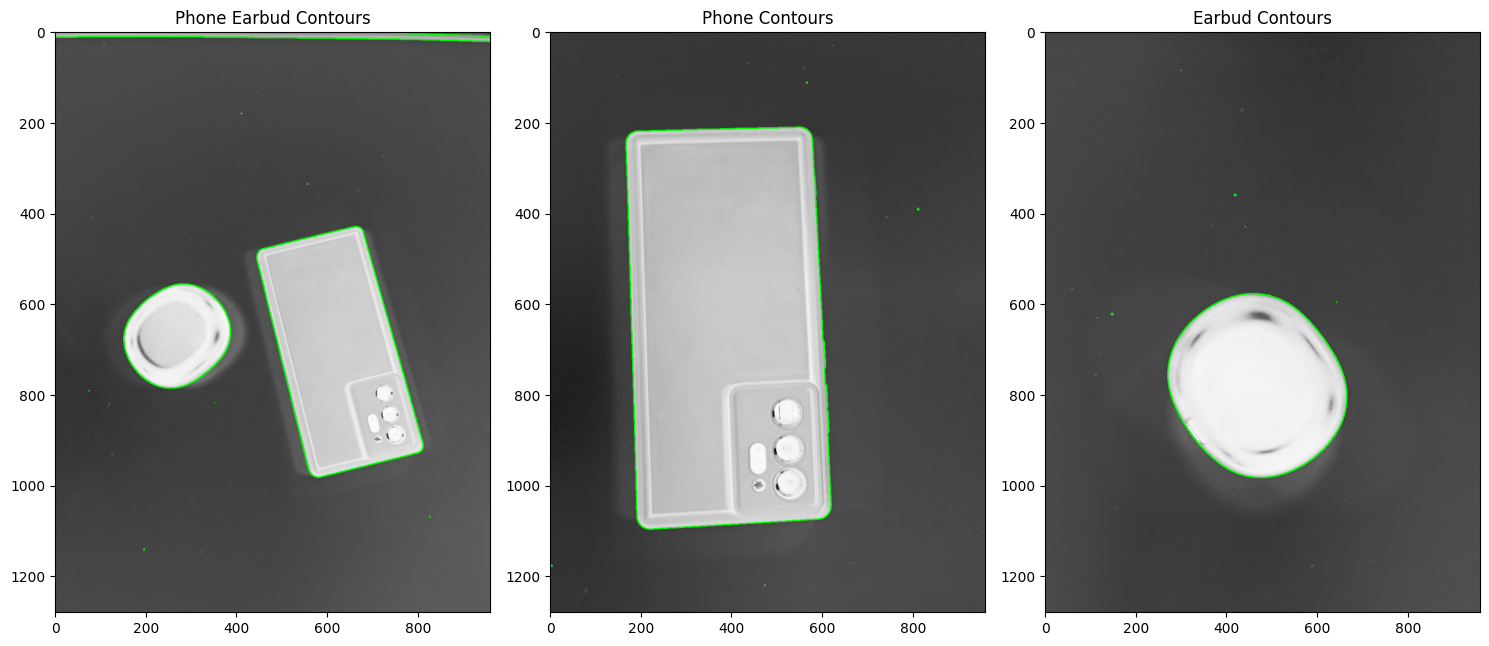

In [50]:
# === Step 1: Invert Colors ===
phone_earbud_inverted = cv.bitwise_not(phone_earbud)
phone_inverted = cv.bitwise_not(phone)
earbud_inverted = cv.bitwise_not(earbud)

# === Step 2: Apply Thresholding ===
_, phone_earbud_thresh = cv.threshold(phone_earbud_inverted, 128, 255, cv.THRESH_BINARY)
_, phone_thresh = cv.threshold(phone_inverted, 128, 255, cv.THRESH_BINARY)
_, earbud_thresh = cv.threshold(earbud_inverted, 128, 255, cv.THRESH_BINARY)

# === Step 3: Find Contours ===
contours_earbud, _ = cv.findContours(earbud_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_phone, _ = cv.findContours(phone_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_phone_earbud, _ = cv.findContours(phone_earbud_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# === Step 4: Convert to BGR for Contour Drawing ===
phone_earbud_contour_img = cv.cvtColor(phone_earbud_inverted, cv.COLOR_GRAY2BGR)
phone_contour_img = cv.cvtColor(phone_inverted, cv.COLOR_GRAY2BGR)
earbud_contour_img = cv.cvtColor(earbud_inverted, cv.COLOR_GRAY2BGR)

# === Step 5: Draw Contours on Original (Inverted) Images ===
cv.drawContours(phone_earbud_contour_img, contours_phone_earbud, -1, (0, 255, 0), 2)
cv.drawContours(phone_contour_img, contours_phone, -1, (0, 255, 0), 2)
cv.drawContours(earbud_contour_img, contours_earbud, -1, (0, 255, 0), 2)

# === Step 6: Display Results ===
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(phone_earbud_contour_img, cv.COLOR_BGR2RGB))
plt.title('Phone Earbud Contours')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(phone_contour_img, cv.COLOR_BGR2RGB))
plt.title('Phone Contours')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(earbud_contour_img, cv.COLOR_BGR2RGB))
plt.title('Earbud Contours')

plt.tight_layout()
plt.show()

In [34]:
print(f"Number of contours in earbud image: {len(contours_earbud)}")
print(f"Number of contours in phone image: {len(contours_phone)}")
print(f"Number of contours in phone-earbud image: {len(contours_phone_earbud)}")
# print(phone_inverted.shape)
print(phone_earbud_contour_img.shape)
print(phone_contour_img.shape)

Number of contours in earbud image: 4
Number of contours in phone image: 5
Number of contours in phone-earbud image: 10
(1280, 960, 3)
(1280, 960, 3)


[[[146 622]]

 [[146 623]]

 [[147 624]]

 [[148 624]]

 [[149 623]]

 [[149 622]]]


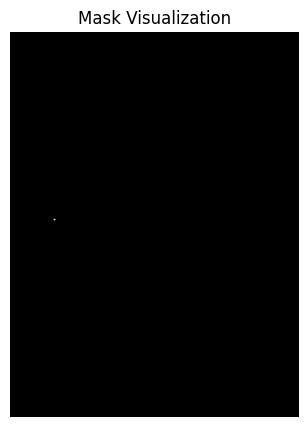

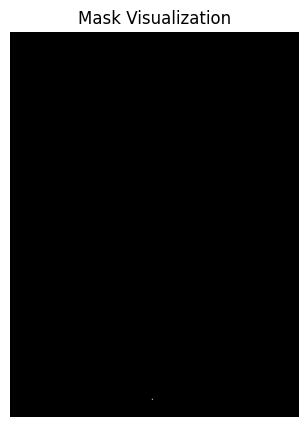

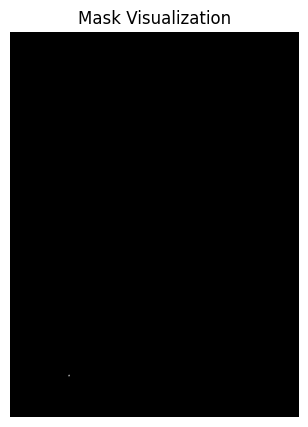

In [48]:
def calculate_histogram_within_contour(image, contour):
    """
    Compute a grayscale histogram for the region inside the given contour.

    Args:
        image (np.ndarray): Grayscale image.
        contour (np.ndarray): Contour defining the region of interest (ROI).
    
    Returns:
        np.ndarray: Normalized histogram.
    """
    # Create a mask with the same dimensions as the image, initialized to zero
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    
    # Fill the contour on the mask with white color (255)
    cv.drawContours(mask, [contour], -1, 255, 2)
    
    # Calculate the histogram using the mask
    histogram = cv.calcHist([image], [0], mask, [256], [0, 256])
    
    # Normalize the histogram
    histogram = cv.normalize(histogram, histogram).flatten()

    plt.figure(figsize=(5, 5))
    plt.imshow(mask, cmap='gray')
    plt.title('Mask Visualization')
    plt.axis('off')
    plt.show()

        
    return histogram

# Example usage with the earbud image and its contours
earbud_histograms = [calculate_histogram_within_contour(earbud_inverted, contours_earbud[0])]
phone_histograms = [calculate_histogram_within_contour(phone_inverted, contours_phone[0])]
phone_earbud_histogram = [calculate_histogram_within_contour(phone_earbud_inverted, contours_phone_earbud[0])]

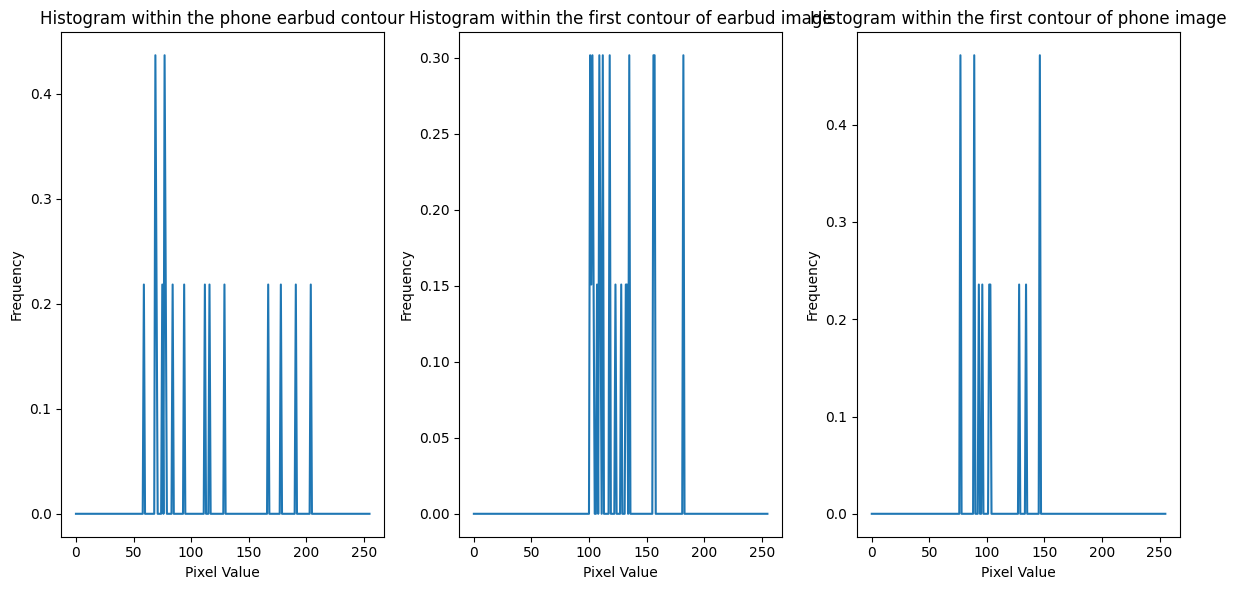

In [47]:
# Display the histogram for the first contour of earbud
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(phone_earbud_histogram[0])
plt.title('Histogram within the phone earbud contour')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(earbud_histograms[0])
plt.title('Histogram within the first contour of earbud image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Display the histogram for the first contour of phone
plt.subplot(1, 3, 3)
plt.plot(phone_histograms[0])
plt.title('Histogram within the first contour of phone image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

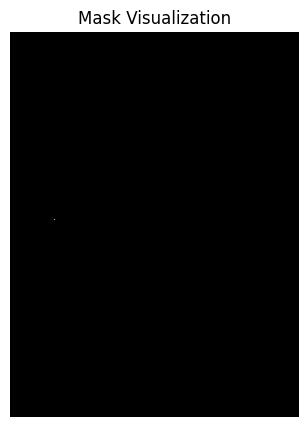

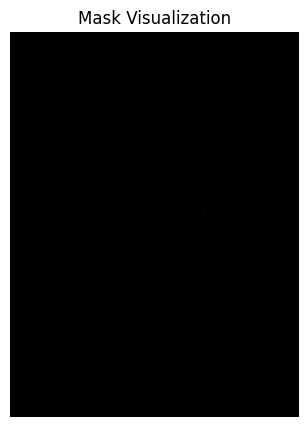

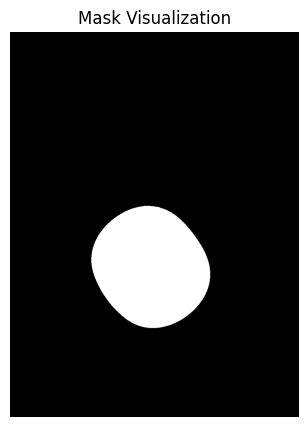

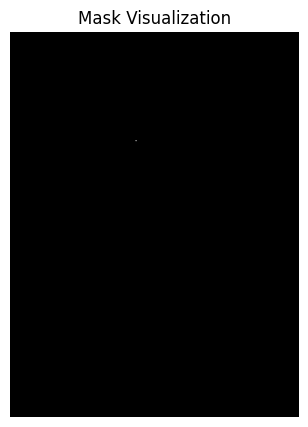

In [ ]:
def compare_histograms(hist1, hist2):
    """
    Compare two histograms using the correlation method.

    Args:
        hist1 (np.ndarray): First histogram.
        hist2 (np.ndarray): Second histogram.

    Returns:
        float: Similarity score (higher means more similar).
    """
    return cv.compareHist(hist1, hist2, cv.HISTCMP_CORREL)


def classify_object(query_image, query_contours, phone_histograms, earbud_histograms):
    """
    Classifies an object in the query image based on histogram similarity with known phone and earbud histograms.

    Args:
        query_image (np.ndarray): Image containing an unknown object.
        query_contours (list of np.ndarray): Contours detected in the query image.
        phone_histograms (list of np.ndarray): Precomputed histograms of known phone objects.
        earbud_histograms (list of np.ndarray): Precomputed histograms of known earbud objects.

    Returns:
        str: Classification result ("Phone detected", "Earbud detected", or "Unknown").
    """
    query_histograms = [calculate_histogram_within_contour(query_image, contour) for contour in query_contours]

    max_phone_similarity = 0
    max_earbud_similarity = 0

    # Compare query histograms with reference phone and earbud histograms
    for q_hist in query_histograms:
        for p_hist in phone_histograms:
            similarity = compare_histograms(q_hist, p_hist)
            max_phone_similarity = max(max_phone_similarity, similarity)

        for e_hist in earbud_histograms:
            similarity = compare_histograms(q_hist, e_hist)
            max_earbud_similarity = max(max_earbud_similarity, similarity)

    # Classification based on maximum similarity
    if max_phone_similarity >= 0.5 and max_earbud_similarity >= 0.5:
        print('Phone Similarity:', max_phone_similarity)
        print('Earbud Similarity:',max_earbud_similarity)
        
        return "Phone and earbud detected"
    elif max_phone_similarity > max_earbud_similarity and max_phone_similarity > 0.5:
        print('Phone Similarity:', max_phone_similarity)
        return "Phone detected"
    elif max_earbud_similarity > max_phone_similarity and max_earbud_similarity > 0.5:
        print('Earbud Similarity:',max_earbud_similarity)
        return "Earbud detected"
    else:
        return "None detected"
    
# Precompute histograms for phone and earbud images
earbud_histograms = [calculate_histogram_within_contour(earbud_inverted, contour) for contour in contours_earbud]
phone_histograms = [calculate_histogram_within_contour(phone_inverted, contour) for contour in contours_phone]
phone_earbud_histograms = [calculate_histogram_within_contour(phone_earbud_inverted, contour) for contour in contours_phone_earbud]

#### Compare Query Image with Phone and Earbud

In [16]:
phone_earbud_noise_inverted = cv.bitwise_not(phone_earbud_noise)
earbud_noise_inverted = cv.bitwise_not(earbud_noise)

# apply thresholding
_, phone_earbud_noise_thresh = cv.threshold(phone_earbud_noise_inverted, 128, 255, cv.THRESH_BINARY)
_, earbud_noise_thresh = cv.threshold(earbud_noise_inverted, 128, 255, cv.THRESH_BINARY)

contours_phone_earbud_noise_inverted, _ = cv.findContours(phone_earbud_noise_thresh , cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_earbud_noise_inverted, _ = cv.findContours(earbud_noise_thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

Phone Similarity: 0.5750816935430705
Earbud Similarity: 0.6468601940320163
Classification result: Phone and earbud detected


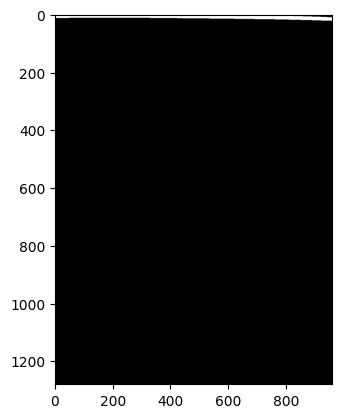

In [17]:
# Classify the query image
query_image = phone_earbud_inverted  # Example query image (can be any new image)
query_contours = contours_phone_earbud  # Contours detected in the query image

result = classify_object(query_image, query_contours, phone_histograms, earbud_histograms)
print(f"Classification result: {result}")

Earbud Similarity: 0.5941193060184052
Classification result: Earbud detected


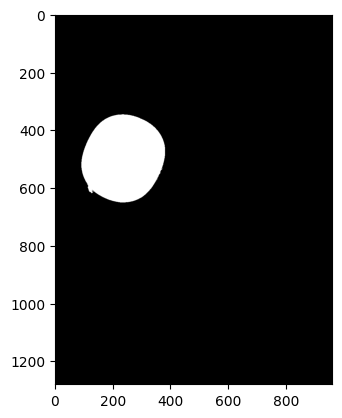

In [18]:
# Classify the query image
query_image = phone_earbud_noise_inverted  # Example query image (can be any new image)
query_contours = contours_earbud_noise_inverted  # Contours detected in the query image

result = classify_object(query_image, query_contours, phone_histograms, earbud_histograms)
print(f"Classification result: {result}")